# Caso 5 - CA417

## Jimena Chacón (B81999)

In [88]:
pip install statsmodels


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score 

dfData = pd.read_csv('train.csv')

dfData1 = dfData[['ID','Age','Num_Bank_Accounts','Credit_Score','Num_Credit_Card','Num_of_Loan','Payment_Behaviour']].copy()

/tmp/ipykernel_2520/608771923.py:6: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  dfData = pd.read_csv('train.csv')


In [90]:
len(dfData1)


100000

In [91]:

dfData1.dtypes

ID                   object
Age                  object
Num_Bank_Accounts     int64
Credit_Score         object
Num_Credit_Card       int64
Num_of_Loan          object
Payment_Behaviour    object
dtype: object

In [92]:
dfData1['malo'] = dfData1['Credit_Score'].map({'Good':0, 'Standard':0, 'Poor':1})
dfData1['malo'].value_counts(normalize=True)

malo
0    0.71002
1    0.28998
Name: proportion, dtype: float64

In [93]:
#Variables dependientes

dfData1 = dfData1.loc[(dfData1['Num_Bank_Accounts']>=0)&(dfData['Num_Bank_Accounts']<=10),:]
dfData1['Edad'] = dfData1['Age'].str.replace('_','')
dfData1['Edad'] = pd.to_numeric(dfData1['Edad'], errors='coerce')
dfData1 = dfData1.loc[(dfData1['Edad']<=90) & (dfData1['Edad']>=18),:]
dfData1['EdadCat'] = pd.cut(dfData1['Edad'], bins = 5)


In [94]:
dfData1.Num_Credit_Card.value_counts()

Num_Credit_Card
5       16622
6       14962
7       14926
4       12967
3       12256
        ...  
1013        1
1405        1
708         1
62          1
518         1
Name: count, Length: 1131, dtype: int64

In [95]:
dfData1.Payment_Behaviour.value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      22832
High_spent_Medium_value_payments    15861
High_spent_Large_value_payments     12557
Low_spent_Medium_value_payments     12510
High_spent_Small_value_payments     10253
Low_spent_Large_value_payments       9428
!@9#%8                               6825
Name: count, dtype: int64

In [96]:
dfData1.Num_of_Loan.value_counts()

Num_of_Loan
3       13204
2       13110
4       12823
0        9799
1        9556
        ...  
1307        1
1196        1
83          1
1478        1
968         1
Name: count, Length: 396, dtype: int64

In [97]:
dfData1['Payment_Behaviour'] = dfData1['Payment_Behaviour'].replace('!@9#%8', "No especifica")

In [98]:
dfData1.Payment_Behaviour.value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      22832
High_spent_Medium_value_payments    15861
High_spent_Large_value_payments     12557
Low_spent_Medium_value_payments     12510
High_spent_Small_value_payments     10253
Low_spent_Large_value_payments       9428
No especifica                        6825
Name: count, dtype: int64

In [99]:
dfData1['Num_of_Loan'] = pd.to_numeric(dfData1['Num_of_Loan'],errors='coerce').fillna(0).astype(int)
dfData1['Num_of_Loan_Cat'] = np.where(
    dfData1['Num_of_Loan'] > 5, 'Mayor a 5',
    np.where(dfData1['Num_of_Loan'] < 0, 0, dfData1['Num_of_Loan'])
)
dfData1.Num_of_Loan_Cat.value_counts()

Num_of_Loan_Cat
Mayor a 5    18109
0            17642
3            13204
2            13110
4            12823
1             9556
5             5822
Name: count, dtype: int64

In [100]:
#Estratificación de los datos
from sklearn.model_selection import train_test_split,KFold,cross_val_score
df_train, df_test = train_test_split(dfData1,test_size=0.25, random_state=42)

In [101]:
#Cálculo de woes

#Numero de cuentas

dfTablaWoeNumCuentas = df_train[['Num_Bank_Accounts','malo']].groupby('Num_Bank_Accounts').agg({'malo':['sum','count']})
dfTablaWoeNumCuentas.columns = ['malo','total']
dfTablaWoeNumCuentas['probMalo'] = dfTablaWoeNumCuentas['malo'] / dfTablaWoeNumCuentas['total']
dfTablaWoeNumCuentas['bueno'] = dfTablaWoeNumCuentas['total'] - dfTablaWoeNumCuentas['malo']
dfTablaWoeNumCuentas['distBad'] = dfTablaWoeNumCuentas['malo'] / dfTablaWoeNumCuentas['malo'].sum()
dfTablaWoeNumCuentas['distGood'] = dfTablaWoeNumCuentas['bueno'] / dfTablaWoeNumCuentas['bueno'].sum()
dfTablaWoeNumCuentas['woe_NumCuentas'] = np.log(dfTablaWoeNumCuentas['distBad'] / dfTablaWoeNumCuentas['distGood'])
dfTablaWoeNumCuentas

,malo,total,probMalo,bueno,distBad,distGood,woe_NumCuentas
Num_Bank_Accounts,,,,,,,
0,546,3154,0.173114,2608,0.028787,0.053517,-0.620085
1,525,3302,0.158995,2777,0.027680,0.056985,-0.722093
2,472,3137,0.150462,2665,0.024885,0.054687,-0.787345
3,1325,8385,0.158020,7060,0.069858,0.144874,-0.729397
4,1330,8508,0.156323,7178,0.070122,0.147295,-0.742207
5,1298,8397,0.154579,7099,0.068435,0.145674,-0.755494
6,3025,8677,0.348623,5652,0.159488,0.115981,0.318537
7,3125,8574,0.364474,5449,0.164760,0.111816,0.387637
8,2959,8534,0.346731,5575,0.156008,0.114401,0.310194


In [102]:
information_valueNC = (dfTablaWoeNumCuentas['woe_NumCuentas'] * (dfTablaWoeNumCuentas['distBad'] - dfTablaWoeNumCuentas['distGood'] )).sum()
information_valueNC

np.float64(0.5291507313058654)

In [103]:
contingenciaNC = dfTablaWoeNumCuentas[['malo','bueno']]
contingenciaNC

,malo,bueno
Num_Bank_Accounts,,
0,546,2608
1,525,2777
2,472,2665
3,1325,7060
4,1330,7178
5,1298,7099
6,3025,5652
7,3125,5449
8,2959,5575


In [104]:
from scipy.stats import chi2_contingency
resNC = chi2_contingency(contingenciaNC)
resNC

Chi2ContingencyResult(statistic=np.float64(7334.355633873566), pvalue=np.float64(0.0), dof=10, expected_freq=array([[ 883.64551914, 2270.35448086],
       [ 925.11017888, 2376.88982112],
       [ 878.8826866 , 2258.1173134 ],
       [2349.19710779, 6035.80289221],
       [2383.65760203, 6124.34239797],
       [2352.55910722, 6044.44089278],
       [2431.00576079, 6245.99423921],
       [2402.14859895, 6171.85140105],
       [2390.94193415, 6143.05806585],
       [ 985.34600216, 2531.65399784],
       [ 984.5055023 , 2529.4944977 ]]))

In [105]:
dfTablaWoeNumCuentas.reset_index(inplace=True)

In [106]:
df_train = pd.merge(df_train,dfTablaWoeNumCuentas[['Num_Bank_Accounts','woe_NumCuentas']], on='Num_Bank_Accounts')
df_test = pd.merge(df_test,dfTablaWoeNumCuentas[['Num_Bank_Accounts','woe_NumCuentas']],on='Num_Bank_Accounts')

In [107]:
dfTablaWoeEdad = df_train[['EdadCat','malo']].groupby('EdadCat').agg({'malo':['sum','count']})
dfTablaWoeEdad.columns = ['malo','total']
dfTablaWoeEdad['probMalo'] = dfTablaWoeEdad['malo'] / dfTablaWoeEdad['total']
dfTablaWoeEdad['bueno'] = dfTablaWoeEdad['total'] - dfTablaWoeEdad['malo']
dfTablaWoeEdad['distBad'] = dfTablaWoeEdad['malo'] / dfTablaWoeEdad['malo'].sum()
dfTablaWoeEdad['distGood'] = dfTablaWoeEdad['bueno'] / dfTablaWoeEdad['bueno'].sum()
dfTablaWoeEdad['woe_Edad'] = np.log(dfTablaWoeEdad['distBad'] / dfTablaWoeEdad['distGood'])
dfTablaWoeEdad

/tmp/ipykernel_2520/2658801363.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfTablaWoeEdad = df_train[['EdadCat','malo']].groupby('EdadCat').agg({'malo':['sum','count']})


,malo,total,probMalo,bueno,distBad,distGood,woe_Edad
EdadCat,,,,,,,
"(17.962, 25.6]",4950,16121,0.307053,11171,0.260980,0.229233,0.129702
"(25.6, 33.2]",5152,16624,0.309913,11472,0.271630,0.235410,0.143111
"(33.2, 40.8]",4523,14574,0.310347,10051,0.238467,0.206251,0.145139
"(40.8, 48.4]",3545,13217,0.268215,9672,0.186904,0.198473,-0.060062
"(48.4, 56.0]",797,7163,0.111266,6366,0.042020,0.130633,-1.134237


In [108]:
contingenciaEdad = dfTablaWoeEdad[['malo','bueno']]
contingenciaEdad

,malo,bueno
EdadCat,,
"(17.962, 25.6]",4950,11171
"(25.6, 33.2]",5152,11472
"(33.2, 40.8]",4523,10051
"(40.8, 48.4]",3545,9672
"(48.4, 56.0]",797,6366


In [109]:
dfTablaWoeEdad.reset_index(inplace=True)

resEdad = chi2_contingency(contingenciaEdad)
resEdad

Chi2ContingencyResult(statistic=np.float64(1219.1387018517853), pvalue=np.float64(1.1301329973592117e-262), dof=4, expected_freq=array([[ 4516.56607926, 11604.43392074],
       [ 4657.48988907, 11966.51011093],
       [ 4083.14831829, 10490.85168171],
       [ 3702.9622151 ,  9514.0377849 ],
       [ 2006.83349828,  5156.16650172]]))

In [110]:
df_train = pd.merge(df_train,dfTablaWoeEdad[['EdadCat','woe_Edad']],on='EdadCat')
df_train.reset_index(inplace=True)
df_test = pd.merge(df_test,dfTablaWoeEdad[['EdadCat','woe_Edad']],on='EdadCat')
df_test.reset_index(inplace=True)

In [111]:
dfTablaWoeCC = df_train[['Num_Credit_Card','malo']].groupby('Num_Credit_Card').agg({'malo':['sum','count']})
dfTablaWoeCC.columns = ['malo','total']
dfTablaWoeCC['probMalo'] = dfTablaWoeCC['malo'] / dfTablaWoeCC['total']
dfTablaWoeCC['bueno'] = dfTablaWoeCC['total'] - dfTablaWoeCC['malo']
dfTablaWoeCC['distBad'] = dfTablaWoeCC['malo'] / dfTablaWoeCC['malo'].sum()
dfTablaWoeCC['distGood'] = dfTablaWoeCC['bueno'] / dfTablaWoeCC['bueno'].sum()
dfTablaWoeCC['woe_CC'] = np.log(dfTablaWoeCC['distBad'] / dfTablaWoeCC['distGood'])
dfTablaWoeCC


/home/codespace/.local/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,malo,total,probMalo,bueno,distBad,distGood,woe_CC
Num_Credit_Card,,,,,,,
0,0,10,0.000000,10,0.000000,0.000205,-inf
1,1,1498,0.000668,1497,0.000053,0.030719,-6.367583
2,9,1554,0.005792,1545,0.000475,0.031704,-4.201919
3,1280,9262,0.138199,7982,0.067486,0.163794,-0.886694
4,1316,9612,0.136912,8296,0.069384,0.170237,-0.897541
...,...,...,...,...,...,...,...
1495,0,1,0.000000,1,0.000000,0.000021,-inf
1496,0,1,0.000000,1,0.000000,0.000021,-inf
1497,0,2,0.000000,2,0.000000,0.000041,-inf


In [112]:
dfTablaWoeCC = dfTablaWoeCC.loc[(dfTablaWoeCC['malo']>0) & (dfTablaWoeCC['total']>=18),:]

In [113]:
contingenciaCC = dfTablaWoeCC[['malo','bueno']]
contingenciaCC

,malo,bueno
Num_Credit_Card,,
1,1,1497
2,9,1545
3,1280,7982
4,1316,8296
5,3425,9022
6,3300,7939
7,3399,7842
8,2076,1218
9,1845,1103


In [114]:
dfTablaWoeCC.reset_index(inplace=True)

resCC = chi2_contingency(contingenciaCC)
resCC

Chi2ContingencyResult(statistic=np.float64(8587.184422823353), pvalue=np.float64(0.0), dof=10, expected_freq=array([[4.19833197e+02, 1.07816680e+03],
       [4.35527896e+02, 1.11847210e+03],
       [2.59579110e+03, 6.66620890e+03],
       [2.69388297e+03, 6.91811703e+03],
       [3.48842711e+03, 8.95857289e+03],
       [3.14987003e+03, 8.08912997e+03],
       [3.15043055e+03, 8.09056945e+03],
       [9.23184614e+02, 2.37081539e+03],
       [8.26213795e+02, 2.12178620e+03],
       [8.45832169e+02, 2.17216783e+03],
       [7.00656204e+00, 1.79934380e+01]]))

In [115]:
df_train = pd.merge(df_train,dfTablaWoeCC[['Num_Credit_Card','woe_CC']],on='Num_Credit_Card')
df_test = pd.merge(df_test,dfTablaWoeCC[['Num_Credit_Card','woe_CC']],on='Num_Credit_Card')

In [116]:
df_train.head()

,index,ID,Age,Num_Bank_Accounts,Credit_Score,Num_Credit_Card,Num_of_Loan,Payment_Behaviour,malo,Edad,EdadCat,Num_of_Loan_Cat,woe_NumCuentas,woe_Edad,woe_CC
0,0,0x15fbf,31,8,Standard,7,0,High_spent_Small_value_payments,0,31,"(25.6, 33.2]",0,0.310194,0.143111,0.107623
1,1,0x22d0a,41_,8,Standard,4,1,Low_spent_Small_value_payments,0,41,"(40.8, 48.4]",1,0.310194,-0.060062,-0.897541
2,2,0xb2f6,28,5,Standard,4,0,Low_spent_Small_value_payments,0,28,"(25.6, 33.2]",0,-0.755494,0.143111,-0.897541
3,3,0x23053,43,7,Standard,8,5,High_spent_Small_value_payments,0,43,"(40.8, 48.4]",5,0.387637,-0.060062,1.476868
4,4,0x1699f,19,7,Poor,8,3,Low_spent_Small_value_payments,1,19,"(17.962, 25.6]",3,0.387637,0.129702,1.476868


In [117]:
import statsmodels.formula.api as smf
model = smf.logit('malo ~ woe_NumCuentas + woe_Edad + Num_of_Loan_Cat+Payment_Behaviour', data=df_train).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.518597
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   malo   No. Observations:                66138
Model:                          Logit   Df Residuals:                    66123
Method:                           MLE   Df Model:                           14
Date:                Sun, 24 Nov 2024   Pseudo R-squ.:                  0.1258
Time:                        23:01:55   Log-Likelihood:                -34299.
converged:                       True   LL-Null:                       -39233.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept             

In [118]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, auc
corte = .3
y_pred = model.predict(df_test) > corte
y_test = df_test['malo']

In [119]:
accurary = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accurary * 100: .2f}%")

print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("\nClassification Repport:\n" , classification_report(y_test,y_pred))

Accuracy:  72.50%
Confusion Matrix:
 [[12170  3718]
 [ 2347  3819]]

Classification Repport:
               precision    recall  f1-score   support

           0       0.84      0.77      0.80     15888
           1       0.51      0.62      0.56      6166

    accuracy                           0.72     22054
   macro avg       0.67      0.69      0.68     22054
weighted avg       0.75      0.72      0.73     22054



In [121]:
y_prob = model.predict(df_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

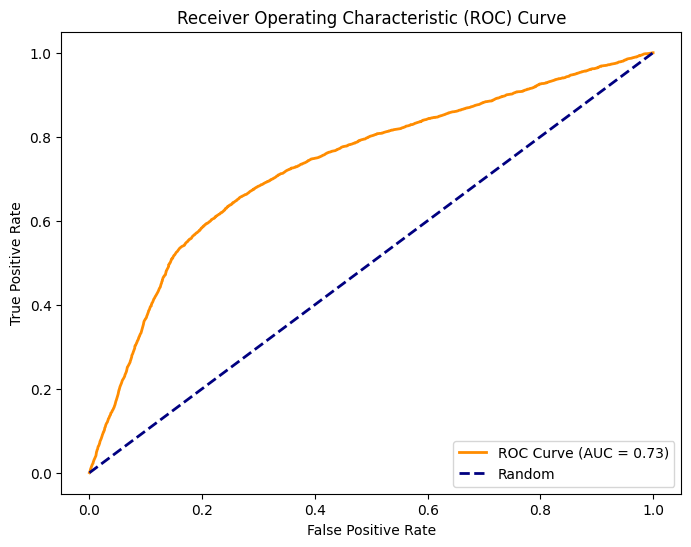

In [122]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()